In [1]:
import numpy as np
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
iris = sns.load_dataset('iris')
tips = sns.load_dataset('tips')

In [2]:
iris[['petal_length','sepal_length','petal_width','sepal_width']]

,petal_length,sepal_length,petal_width,sepal_width
0,1.4,5.1,0.2,3.5
1,1.4,4.9,0.2,3.0
2,1.3,4.7,0.2,3.2
3,1.5,4.6,0.2,3.1
4,1.4,5.0,0.2,3.6
...,...,...,...,...
145,5.2,6.7,2.3,3.0
146,5.0,6.3,1.9,2.5
147,5.2,6.5,2.0,3.0
148,5.4,6.2,2.3,3.4


In [5]:
import pandas as pd
x = ['yes', 'yes', 'yes', 'yes', 'no', 'no', 'no','no', 'no']
y = ['yes', 'yes', 'no', 'no', 'no', 'no', 'yes','no', 'no']
z = ['yes', 'no', 'yes', 'no','no', 'yes', 'no','no', 'yes']

data = pd.DataFrame({'x': x, 'y': y,'z':z})

In [7]:
rng = np.random.default_rng(123)
df = pd.DataFrame({
    "name": [f"item {i}" for i in range(1, 51)],
    "value": rng.integers(low=30, high=100, size=50),
    "group": ["A"] * 10 + ["B"] * 20 + ["C"] * 12 + ["D"] * 8
})

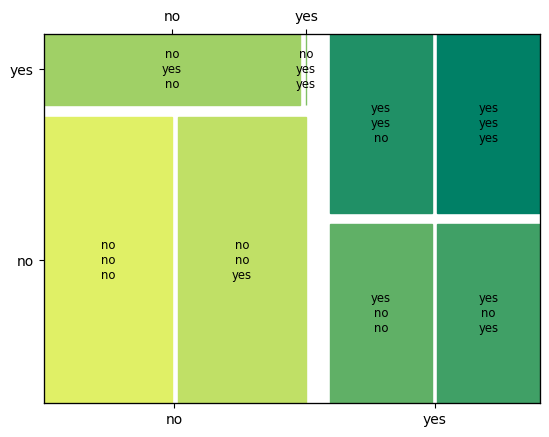

In [6]:
import itertools
import matplotlib.pyplot as plt
from statsmodels.graphics.mosaicplot import mosaic

dataset = data

tmp_list = []
for i in range(len(dataset.columns)):
    tmp_list.append(list(set(dataset[dataset.columns[i]])))
    
tmp_01 = list(itertools.product(*tmp_list))
num_categories = len(tmp_01)

cmap = plt.get_cmap('summer')
category_colors = [cmap(i / num_categories) for i in range(num_categories)]

props = {}
for i in range(num_categories):
    props[tmp_01[i]] = {'color':category_colors[i]}

mosaic_data = dataset.groupby(list(dataset.columns)).size().unstack().fillna(0)
mosaic(mosaic_data.stack(), gap=0.05, properties=props)

plt.show()

In [1]:
def connected_scatter(data, x: str, y: str):
    from bokeh.plotting import curdoc, show
    import pandas as pd
    from bokeh.plotting import figure

    p = figure(width=500, height=500)

    data = pd.DataFrame.pivot_table(data, values=y, index=x,aggfunc='mean').reset_index().sort_values(by=x)
    data_x = data[x]
    data_y = data[y]

    line_color = '#1B7837'

    curdoc().theme = 'caliber'
    p.line(data_x, data_y, color=line_color)
    p.circle(data_x, data_y, line_color=line_color, fill_color="white")
    p.xaxis.axis_label= f'{x}'
    p.yaxis.axis_label= f'{y}'
    show(p)

<Axes: >

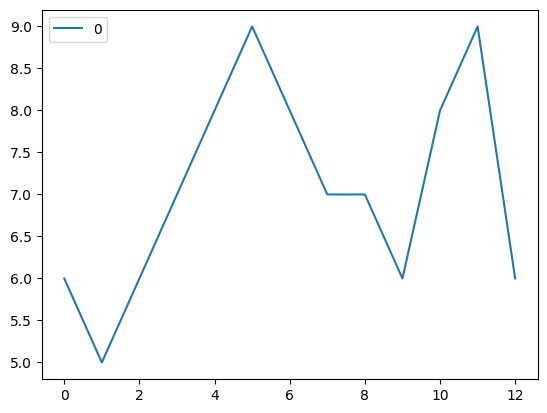

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
a = [6,5,6,7,8,9,8,7,7,6,8,9,6]
data = pd.DataFrame(a)
data.plot()

In [31]:
def matplotlib_font_korean(font_path = "C:/Windows/Fonts/malgun.ttf"):
    """
    matplotlib에서 이미지를 띄울 때, 
    한글이 깨지는 현상을 바로잡아줍니다.
    맑은 고딕 폰트가 있는 경로와 파일명을 지정하면 되며,
    default는 "C:/Windows/Fonts/malgun.ttf" 입니다.
    """
    from matplotlib import font_manager, rc

    font = font_manager.FontProperties(fname = font_path).get_name()
    rc('font', family = font)
matplotlib_font_korean()

C:\Users\exem\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51648 (\N{HANGUL SYLLABLE JI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\exem\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 50669 (\N{HANGUL SYLLABLE YEOG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\exem\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 45817 (\N{HANGUL SYLLABLE DANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\exem\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44540 (\N{HANGUL SYLLABLE GEUN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\exem\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44048 (\N{HANGUL SYLLABLE GAM}) mi

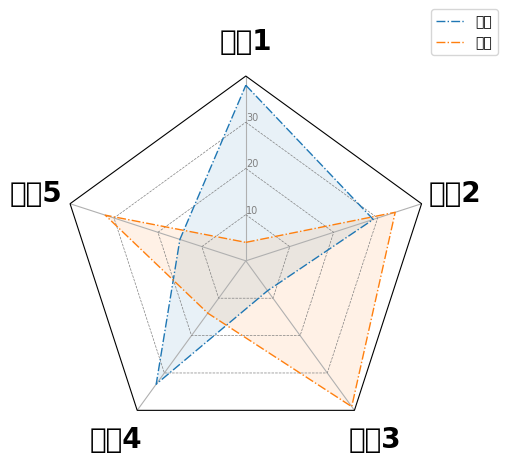

In [20]:
import pandas as pd
df = pd.DataFrame({
'group': ['당근','감귤'],
'지역1': [38, 4],
'지역2': [29, 34],
'지역3': [8, 39],
'지역4': [33, 14],
'지역5': [15, 32,]
})
import matplotlib.pyplot as plt
import itertools
from math import pi
from matplotlib.spines import Spine
from matplotlib.path import Path
from matplotlib.transforms import Affine2D

dataset = df

categories=list(dataset)[1:]
N = len(categories)

values=dataset.loc[0].drop('group').values.flatten().tolist()
values += values[:1]

angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]

ax = plt.subplot(111, polar=True)

ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)

plt.xticks(angles[:-1], categories)

a = []
for i in range(len(dataset)):
    a.append(dataset.loc[i].drop('group').values.flatten().tolist())

max_ = max(list(itertools.chain(*a)))
rounded_ = round(max_,-len(str(int(round(max_,-1))))+1)
tmp_list = [round(rounded_*.25,1),round(rounded_*.5,1),round(rounded_*.75,1)]

ax.set_rlabel_position(0)
plt.yticks(tmp_list, [str(int(tmp_list[0])),str(int(tmp_list[1])),str(int(tmp_list[2]))], color="grey", size=7)
plt.xticks(fontsize=20, fontweight='bold')
plt.ylim(0,rounded_)

# 각각 25%, 50%, 75%에 다각형으로 line graph 그리기
ax.plot(angles, [int(tmp_list[0])]*(N+1), color='grey', linewidth=.5, linestyle='--')
ax.plot(angles, [int(tmp_list[1])]*(N+1), color='grey', linewidth=.5, linestyle='--')
ax.plot(angles, [int(tmp_list[2])]*(N+1), color='grey', linewidth=.5, linestyle='--')

for i in range(len(dataset)):
    values=dataset.loc[i].drop('group').values.flatten().tolist()
    g_nm = dataset['group'][i]
    values += values[:1]
    ax.plot(angles, values, linewidth=1, linestyle='dashdot', label=f"{g_nm}") # linestyle : dashed, solid, dashdot, dotted --> '-' / '--' / '-.' / ':'
    
    ax.tick_params(axis='x', which='major', pad=15)
    ax.fill(angles, values, alpha=0.1)

spine = Spine(axes=ax,
        spine_type='circle',
        path=Path.unit_regular_polygon(len(categories)))

## Axes의 중심과 반지름을 맞춰준다.
spine.set_transform(Affine2D().scale(.5).translate(.5, .5)+ax.transAxes)

ax.spines = {'polar':spine} ## frame의 모양을 원에서 폴리곤으로 바꿔줘야한다.

# 그리드 선 설정
for g in ax.yaxis.get_gridlines():
    g.set_visible(False)
    
plt.legend(loc='upper right', bbox_to_anchor=(1.2,1.2))
plt.show()

In [47]:
from math import pi
from typing import Any, Literal

from bokeh.plotting import figure
from bokeh.core.properties import expr, value
from bokeh.document import Document
from bokeh.embed import file_html
from bokeh.models import (Arc, Circle, ColumnDataSource, Plot,
                          PolarTransform, Range1d, Ray, AnnularWedge, Text)
from bokeh.util.browser import view

xdr = Range1d(start=-1.25, end=1.25)
ydr = Range1d(start=-1.25, end=1.25)

# plot = figure(width=600, height=600)
# plot.x_range = xdr
# plot.y_range = ydr
plot = Plot(x_range=xdr, y_range=ydr, width=600, height=600)

plot.toolbar_location = None
plot.outline_line_color = None

start_angle = pi
end_angle = 0

max_kmh = 250
max_mph = max_kmh*0.621371

major_step, minor_step = 25, 5


# 부채꼴을 그리기 위한 각도 범위 설정 (시작 각도, 끝 각도)
an_start_angle = 0
an_end_angle = pi / 4  # pi/2는 90도를 의미합니다.

# 부채꼴 생성
annular_wedge = AnnularWedge(x=0, y=0, inner_radius=0, outer_radius=0.75,
                             start_angle=an_start_angle, end_angle=an_end_angle,
                             fill_color="yellow", line_color="black", line_width=1)

# Plot에 부채꼴 추가
plot.add_glyph(annular_wedge)

# 부채꼴 생성
annular_wedge = AnnularWedge(x=0, y=0, inner_radius=0, outer_radius=1,
                             start_angle=end_angle, end_angle=start_angle,
                             fill_color=None, line_color="black", line_width=1)

# Plot에 부채꼴 추가
plot.add_glyph(annular_wedge)

# plot.add_glyph(Circle(x=0, y=0, radius=1.00, fill_color=None, line_color="black"))
# plot.add_glyph(Circle(x=0, y=0, radius=0.05, fill_color="gray", line_color="black"))

plot.add_glyph(Text(x=0, y=+0.15, text=value("생산량"), text_color="#E74C3C", text_align="center", text_baseline="bottom", text_font_style="bold"))
# plot.add_glyph(Text(x=0, y=-0.15, text=value("mph"), text_color="blue", text_align="center", text_baseline="top", text_font_style="bold"))

def data(val: float):
    """Shorthand to override default units with "data", for e.g. `Ray.length`. """
    return value(val, units="data")

def speed_to_angle(speed: float, units: str) -> float:
    max_speed = max_kmh if units == "kmh" else max_mph
    speed = min(max(speed, 0), max_speed)
    total_angle = start_angle - end_angle
    angle = total_angle*float(speed)/max_speed
    return start_angle - angle

def add_needle(speed: float, units: str) -> None:
    angle = speed_to_angle(speed, units)
    plot.add_glyph(Ray(x=0, y=0, length=data(0.75), angle=angle,    line_color="black", line_width=3))
    plot.add_glyph(Ray(x=0, y=0, length=data(0.10), angle=angle-pi, line_color="black", line_width=3))

def add_gauge(radius: float, max_value: float, length: float, direction: Literal[-1, 1], color: Any, major_step: int, minor_step: int) -> None:
    major_angles, minor_angles = [], []

    total_angle = start_angle - end_angle

    major_angle_step = float(major_step)/max_value*total_angle
    minor_angle_step = float(minor_step)/max_value*total_angle

    major_angle = 0

    while major_angle <= total_angle:
        major_angles.append(start_angle - major_angle)
        major_angle += major_angle_step

    minor_angle = 0

    while minor_angle <= total_angle:
        minor_angles.append(start_angle - minor_angle)
        minor_angle += minor_angle_step

    major_labels = [ major_step*i for i, _ in enumerate(major_angles) ]

    n = major_step/minor_step
    minor_angles = [ x for i, x in enumerate(minor_angles) if i % n != 0 ]

    glyph = Arc(x=0, y=0, radius=radius, start_angle=start_angle, end_angle=end_angle, direction="clock", line_color=color, line_width=2)
    plot.add_glyph(glyph)

    rotation = 0 if direction == 1 else -pi

    angles = [ angle + rotation for angle in major_angles ]
    source = ColumnDataSource(dict(major_angles=major_angles, angle=angles))

    t = PolarTransform(radius=radius, angle="major_angles")
    glyph = Ray(x=expr(t.x), y=expr(t.y), length=data(length), angle="angle", line_color=color, line_width=2)
    plot.add_glyph(source, glyph)

    angles = [ angle + rotation for angle in minor_angles ]
    source = ColumnDataSource(dict(minor_angles=minor_angles, angle=angles))

    t = PolarTransform(radius=radius, angle="minor_angles")
    glyph = Ray(x=expr(t.x), y=expr(t.y), length=data(length/2), angle="angle", line_color=color, line_width=1)
    plot.add_glyph(source, glyph)

    text_angles = [ angle - pi/2 for angle in major_angles ]
    source = ColumnDataSource(dict(major_angles=major_angles, angle=text_angles, text=major_labels))

    t = PolarTransform(radius=radius + 2*length*direction, angle="major_angles")
    glyph = Text(x=expr(t.x), y=expr(t.y), angle="angle", text="text", text_align="center", text_baseline="middle")
    plot.add_glyph(source, glyph)

add_gauge(0.75, max_kmh, 0.05, +1, "black", major_step, minor_step)
# add_gauge(0.70, max_mph, 0.05, -1, "blue", major_step, minor_step)

add_needle(84, "ton")

doc = Document()
doc.add_root(plot)

if __name__ == "__main__":
    doc.validate()
    filename = "gauges.html"
    with open(filename, "w") as f:
        f.write(file_html(doc, title="Gauges"))
    print(f"Wrote {filename}")
    view(filename)

Wrote gauges.html


In [34]:
from math import pi
from bokeh.plotting import figure, show

# Bokeh figure 생성
p = figure(width=400, height=400)

# 원의 중심 좌표와 반지름 설정
x, y = 0, 0
inner_radius = 20
outer_radius = 100

# 부채꼴을 그리기 위한 각도 범위 설정 (시작 각도, 끝 각도)
start_angle = 0
end_angle = pi / 2  # pi/2는 90도를 의미합니다.

# 부채꼴 그리기
p.annular_wedge(x=x, y=y, inner_radius=inner_radius, outer_radius=outer_radius,
                 start_angle=start_angle, end_angle=end_angle,
                 inner_radius_units="screen", outer_radius_units="screen",  # 반지름을 화면 단위로 설정
                 color="navy", alpha=0.8, line_color="black", line_width=2)

# 기타 설정...
p.axis.visible = False  # 축 숨기기

# 시각화 보기
show(p)

In [3]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
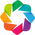

:Violin   [day,smoker]   (tip)

In [15]:
import holoviews as hv

hv.extension('bokeh')

tmp = hv.Violin(tips, ['day','smoker'], 'tip').opts(width=600, split='smoker', show_legend=True, cmap=['gold','green'])
hv.output(tmp)